In [1]:
from scipy import misc
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import warnings; warnings.filterwarnings('ignore')
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from os import listdir

In [2]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    temp = title.replace('.','/').split('/')[1]
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B, A= data[i].T
#     for angle in range(0,360):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax = fig.add_subplot(111,projection='3d')
    ax.view_init(20,50)
    ax.scatter(R, G, B, color=colors, marker='.',alpha=0.6)
    ax.set(xlabel='Red', ylabel='Green', zlabel='Blue', xlim=(0, 1), ylim=(0, 1), zlim=(0,1))
#         plt.savefig('./giffy/'+temp+'-'+str(angle).zfill(3)+'.png',dpi=100)

    fig.suptitle(title, size=20);

In [3]:
def load_img(image_path):
    image = misc.imread(image_path)
#     ax = plt.axes(xticks=[],yticks=[])
#     ax.imshow(image)
#     ax.set_axis_off()
#     plt.show()
    image_data=image/255.0
    image_data = image_data.reshape(image.shape[0]*image.shape[1],image.shape[2])
#     plot_pixels(image_data,title=image_path+' Colors')
    return image, image_data

In [4]:
def show_pokemon(pokemon):
    fig, ax = plt.subplots(figsize=(6,6))
    ax = plt.axes(xticks=[],yticks=[])
    ax.set_axis_off()
    ax.imshow(pokedex[str(pokemon)][0])
    ax.set_title(str(pokemon).title(),size=16)
    plt.show()

In [5]:
def train_kluster(data, num_clusters):
    kmeans=MiniBatchKMeans(num_clusters)
#     kmeans=KMeans(num_clusters)
    kmeans.fit(data)
    return kmeans

In [6]:
def recolor(kluster,image,data):
    new_data = kluster.cluster_centers_[kluster.predict(data)]
#     plot_pixels(data,colors=new_data,title='New Colors')
    recoloring = new_data.reshape(image.shape)
    fig, ax = plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(image)
    ax[0].set_axis_off()
    ax[0].set_title('Original',size=16)
    ax[1].imshow(recoloring)
    ax[1].set_axis_off()
    ax[1].set_title('Recolored',size=16)
    return new_data

In [7]:
pokedex = {}
for file in listdir('pokemon'):
    pokedex[file.rstrip('.png')]=load_img('pokemon/'+file)

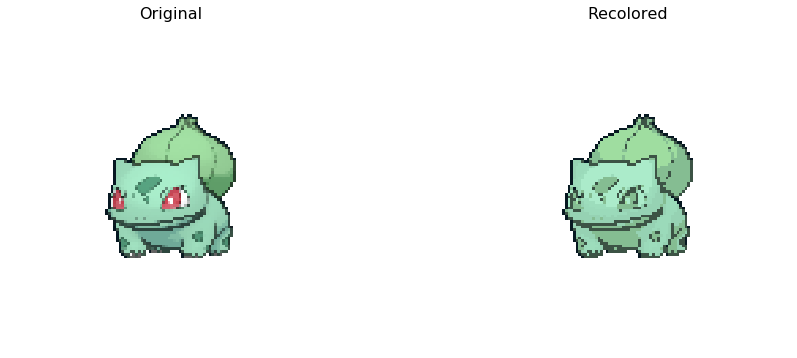

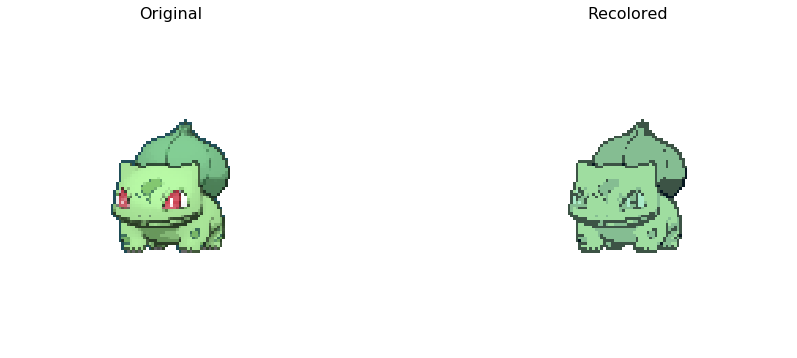

In [9]:
bulbasaur, bulbasaur_data = load_img('pokemon/norm.png')
shiny_bulb, shiny_bulb_data = load_img('pokemon/shiny.png')
bulbasaur_kluster = train_kluster(bulbasaur_data,16)
re_bulbasaur = recolor(bulbasaur_kluster,bulbasaur,bulbasaur_data)
re_shinybulb = recolor(bulbasaur_kluster,shiny_bulb,shiny_bulb_data)

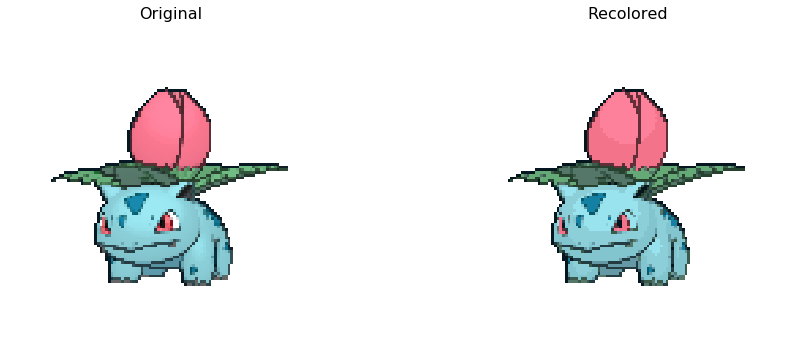

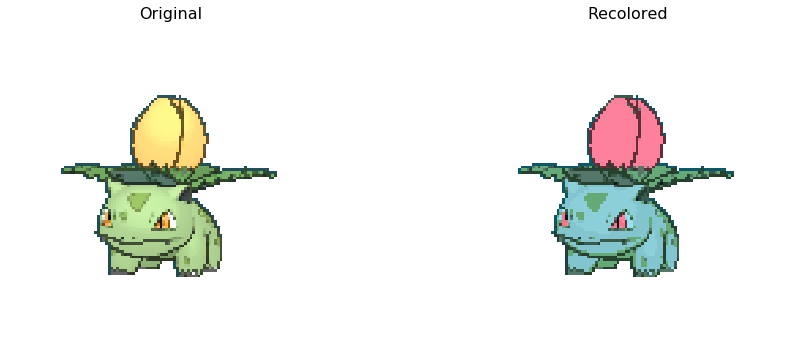

In [8]:
ivysaur, ivysaur_data = load_img('pokemon/test.png')
shiny_ivy, shiny_ivy_data = load_img('pokemon/test_shiny.png')
ivysaur_kluster = train_kluster(ivysaur_data,16)
re_ivysaur = recolor(ivysaur_kluster,ivysaur,ivysaur_data)
re_shinyivy = recolor(ivysaur_kluster,shiny_ivy,shiny_ivy_data)

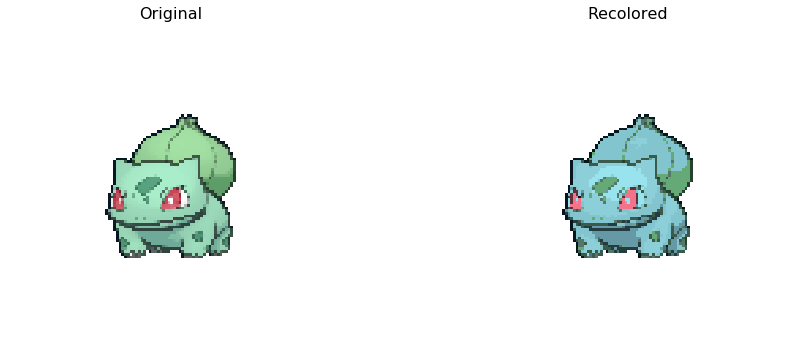

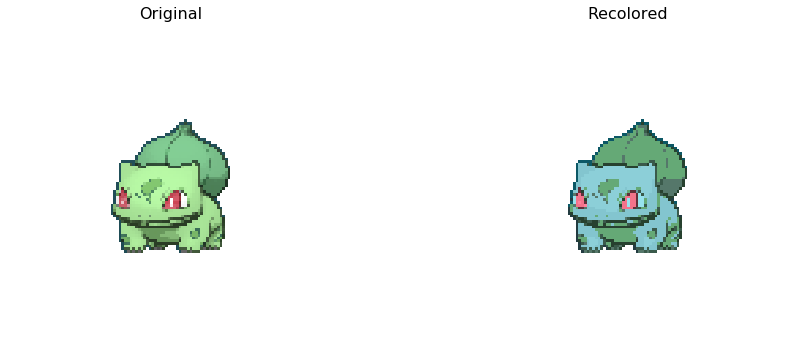

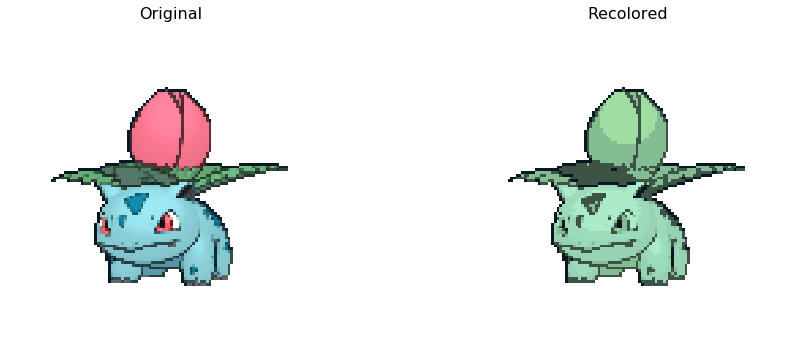

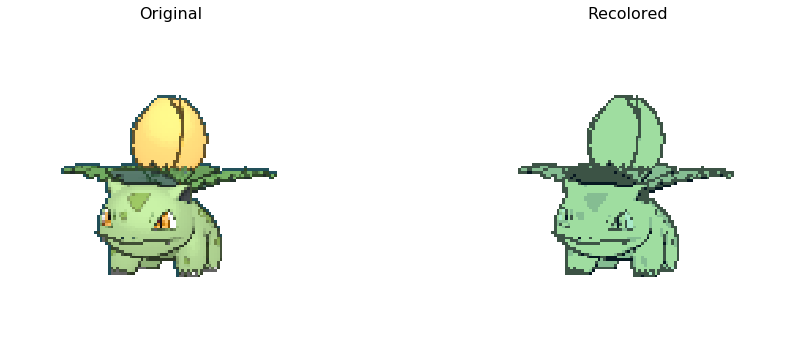

In [10]:
re_bulbivy = recolor(ivysaur_kluster,bulbasaur,bulbasaur_data)
re_shiny_bulbivy = recolor(ivysaur_kluster,shiny_bulb,shiny_bulb_data)
re_ivybulb = recolor(bulbasaur_kluster, ivysaur,ivysaur_data)
re_shiny_ivybulb = recolor(bulbasaur_kluster, shiny_ivy, shiny_ivy_data)

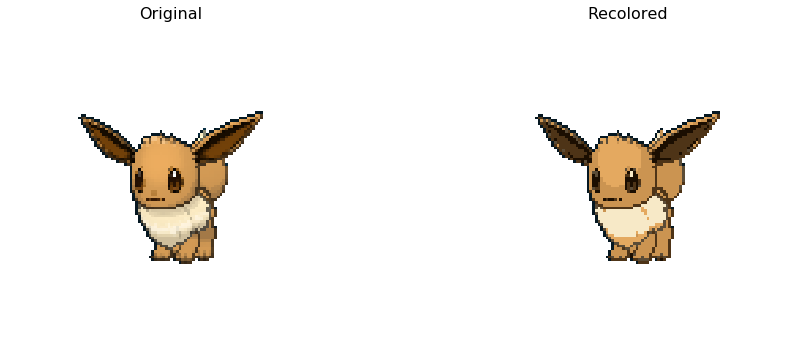

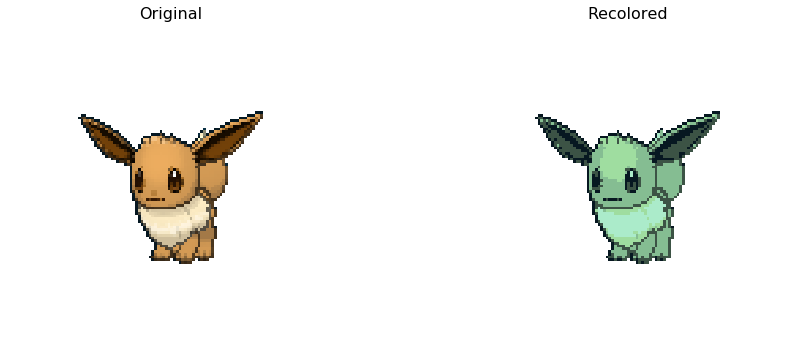

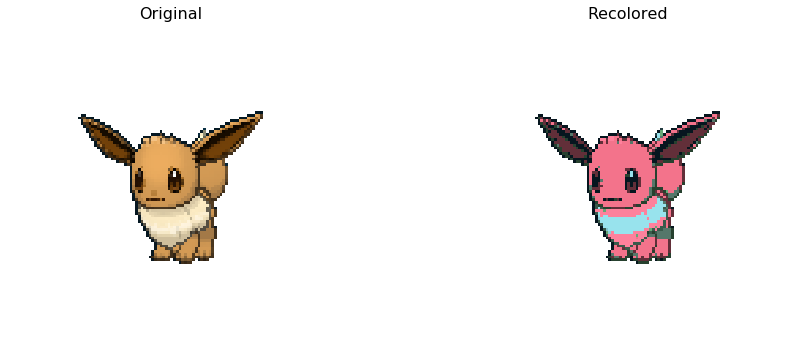

In [11]:
eevee, eevee_data = load_img('pokemon/eevee.png')
eevee_kluster = train_kluster(eevee_data, 16)
re_eevee = recolor(eevee_kluster,eevee,eevee_data)
re_eeveebulb = recolor(bulbasaur_kluster,eevee,eevee_data)
re_eeveeivy = recolor(ivysaur_kluster,eevee,eevee_data)

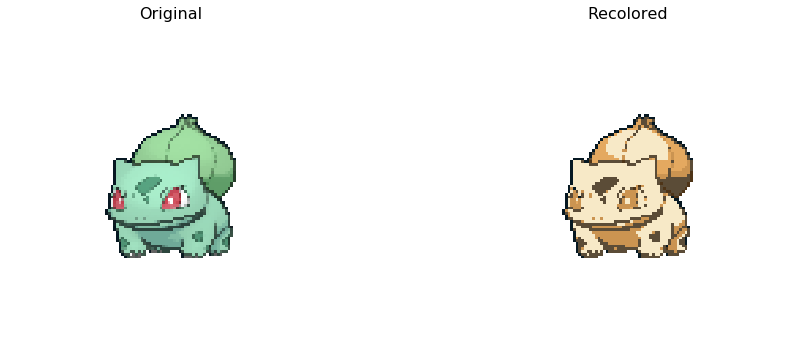

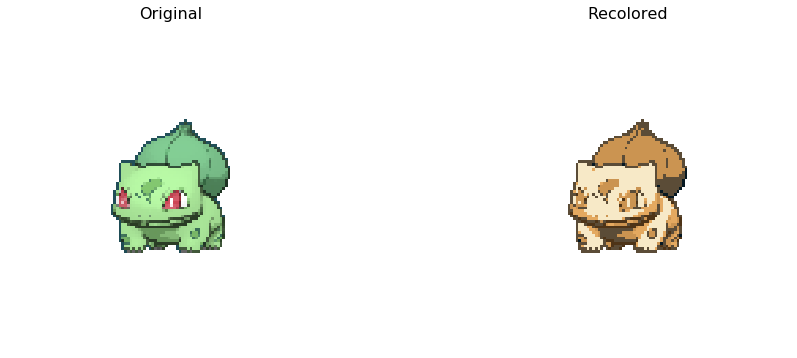

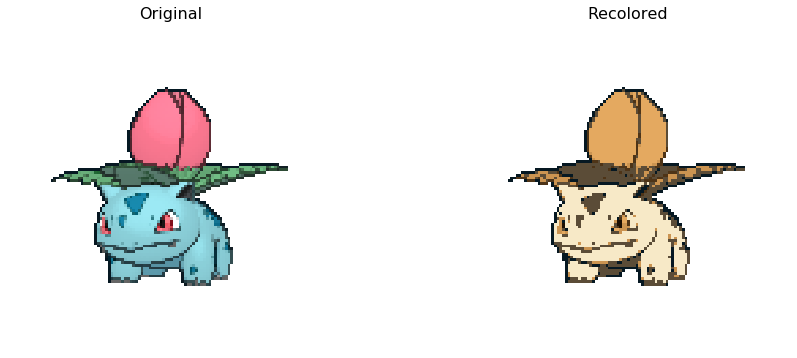

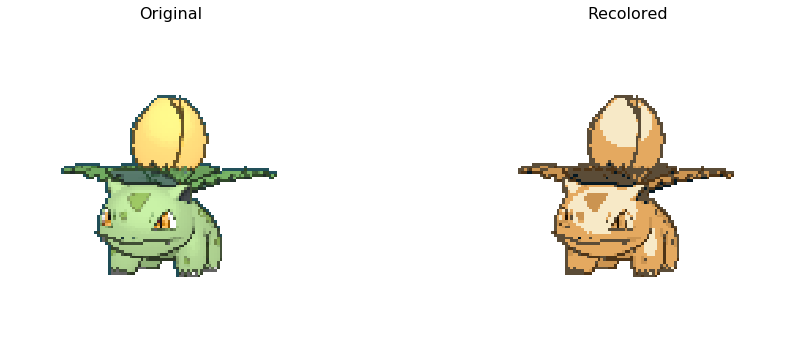

In [12]:
re_bulbeve = recolor(eevee_kluster,bulbasaur,bulbasaur_data)
re_shiny_bulbeve = recolor(eevee_kluster,shiny_bulb,shiny_bulb_data)
re_ivyeve = recolor(eevee_kluster, ivysaur,ivysaur_data)
re_shiny_ivyeve = recolor(eevee_kluster, shiny_ivy, shiny_ivy_data)

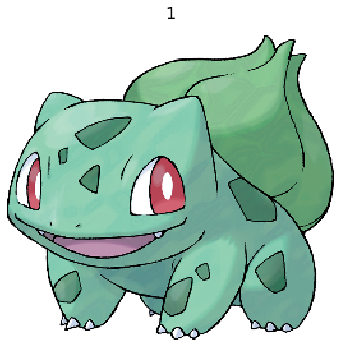

In [13]:
number = 1
show_pokemon(number)
kluster = train_kluster(pokedex[str(number)][1],16)

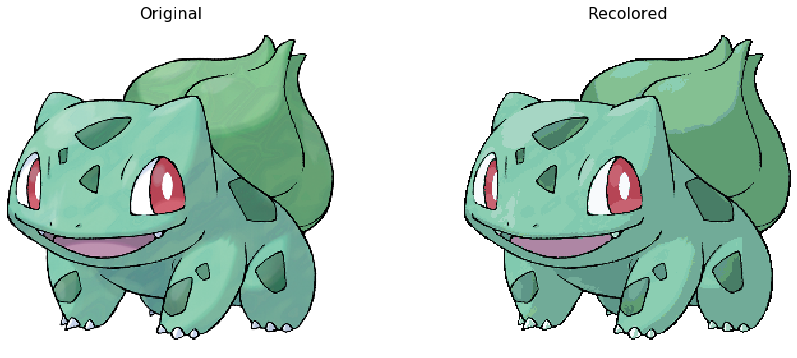

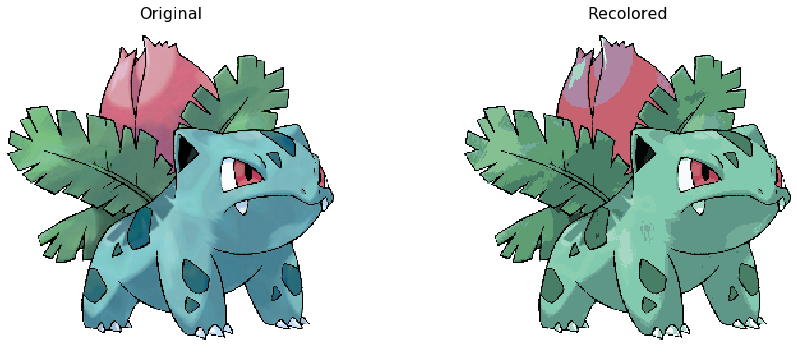

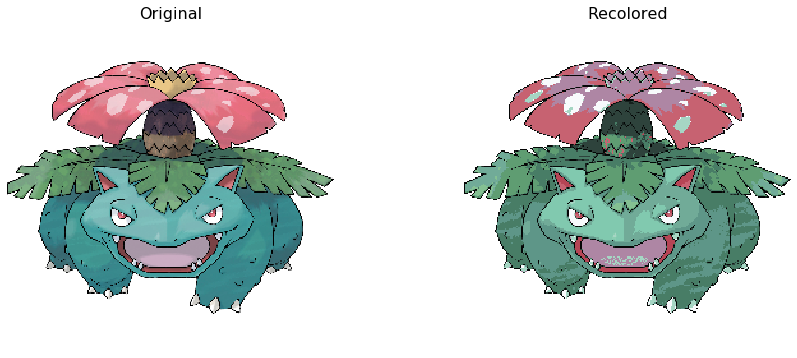

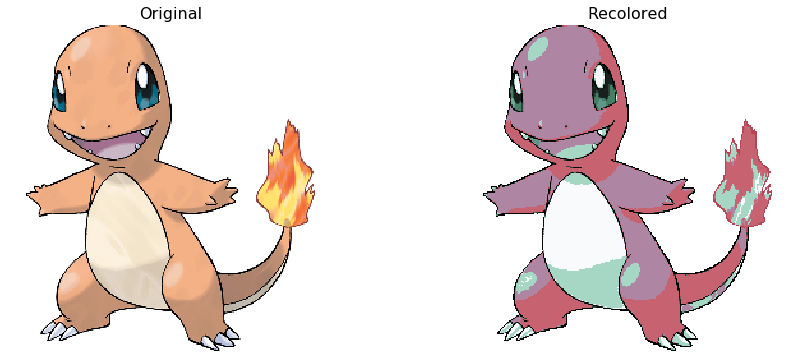

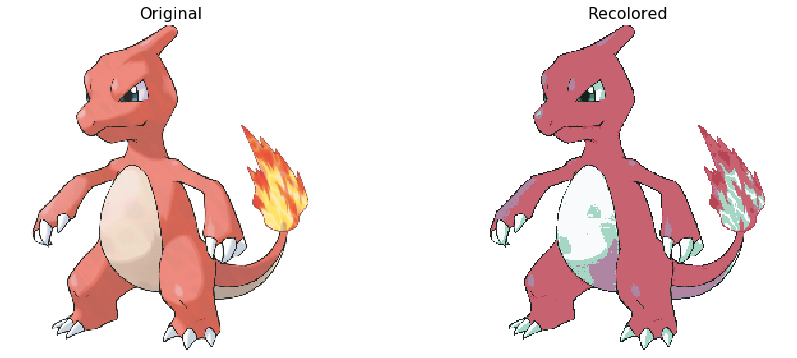

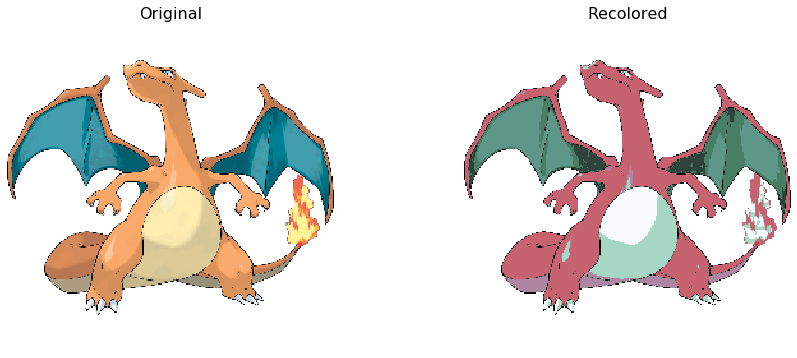

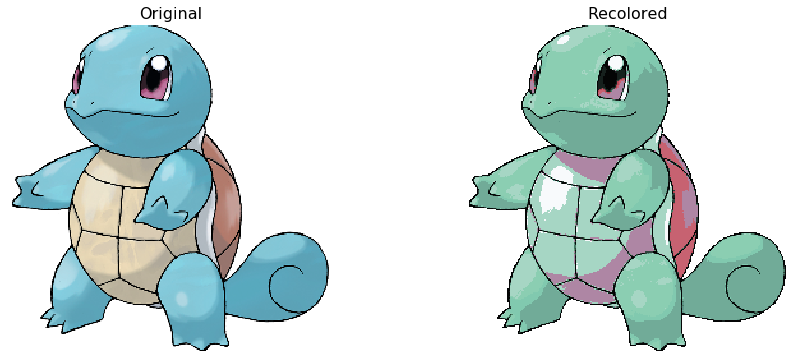

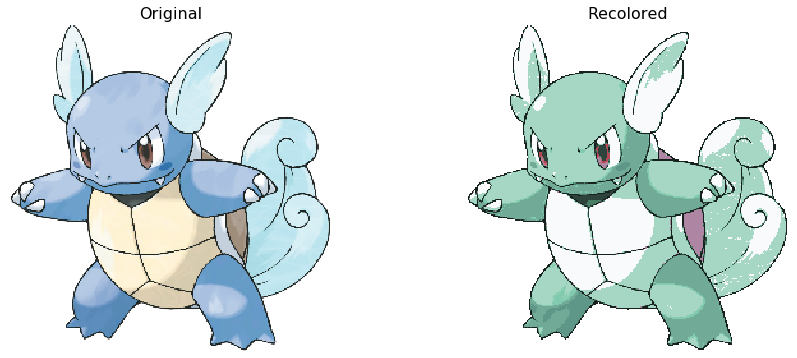

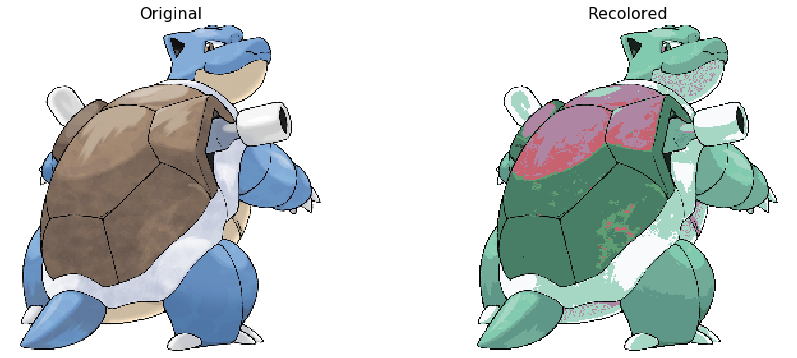

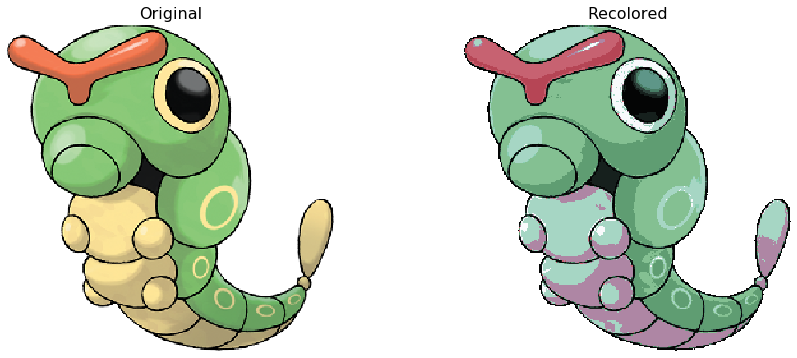

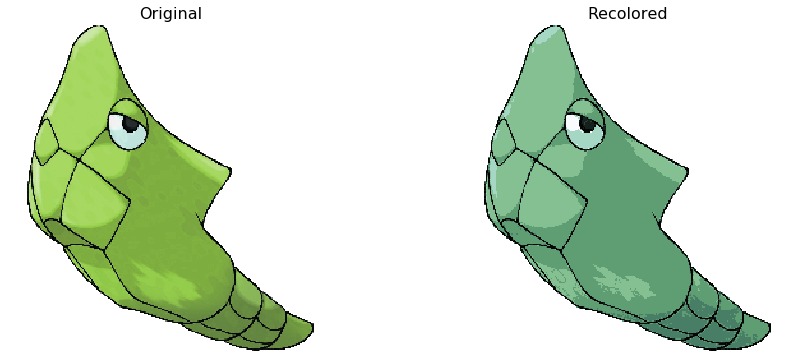

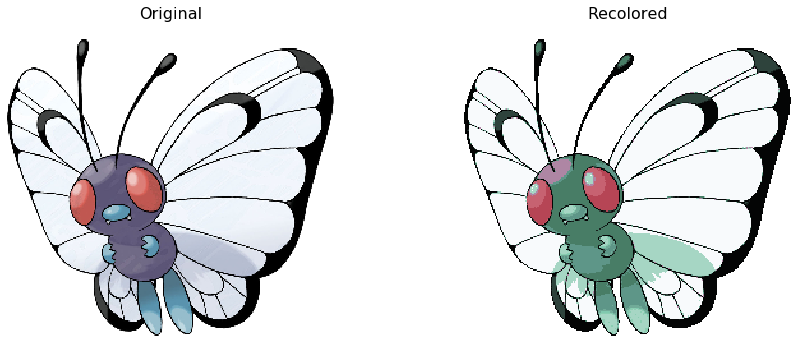

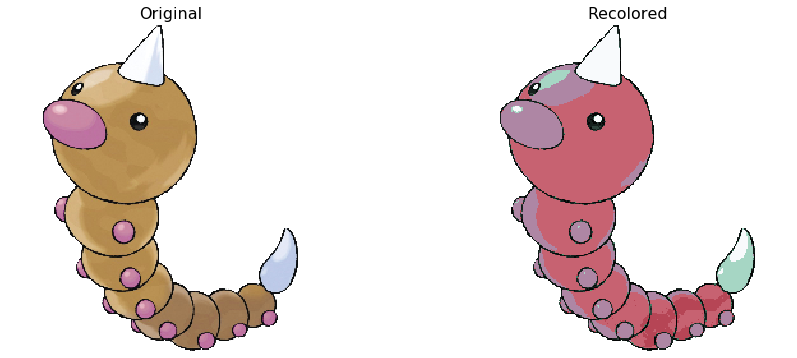

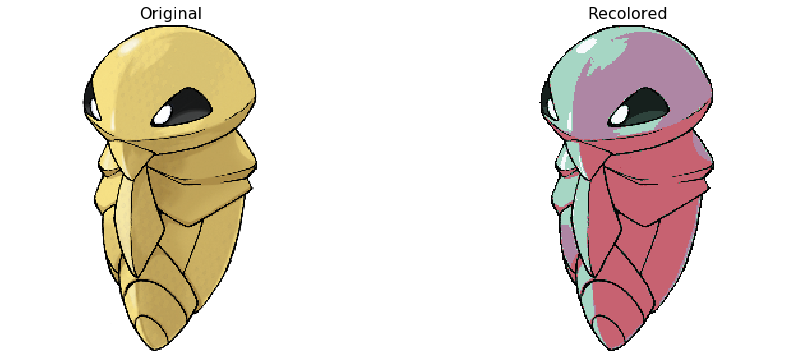

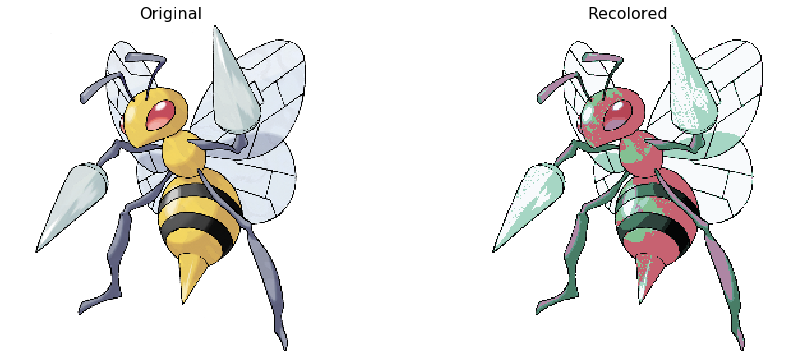

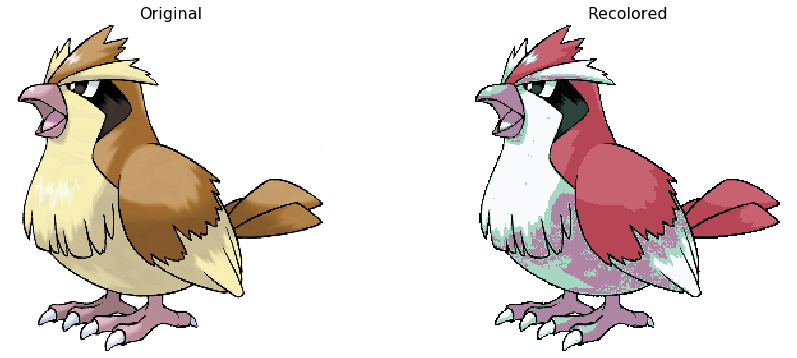

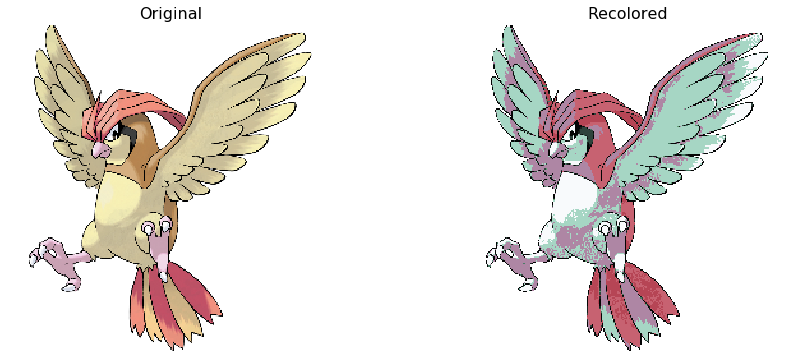

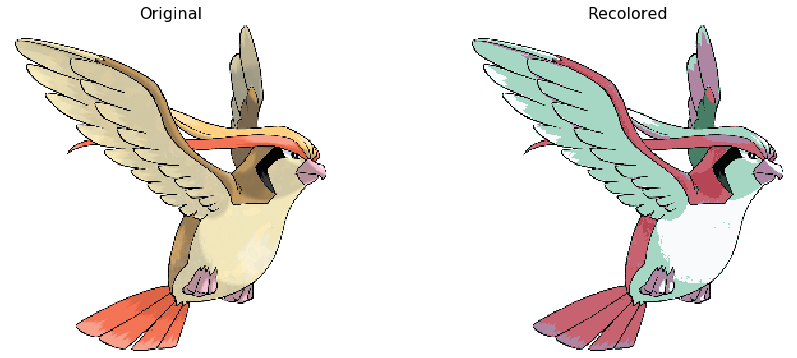

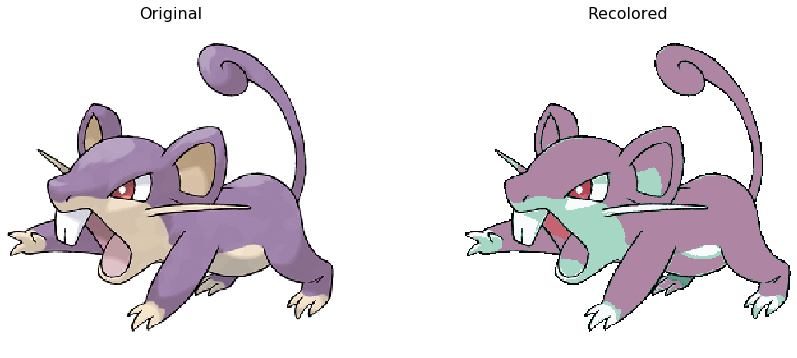

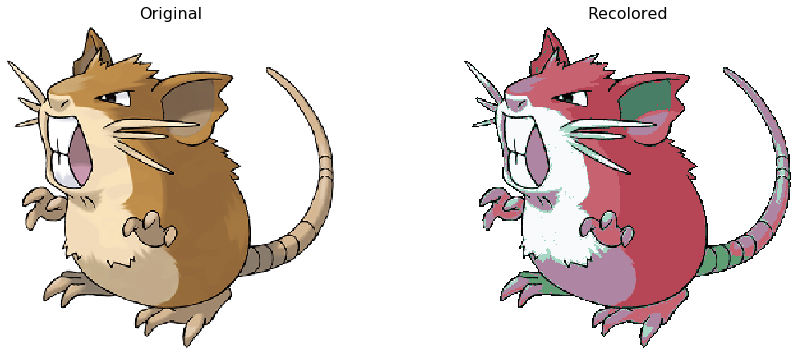

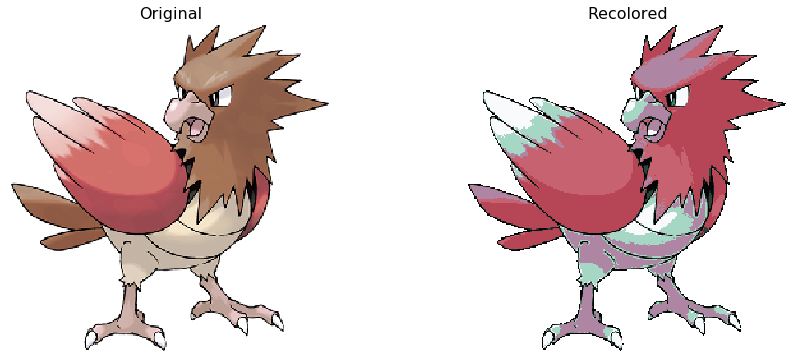

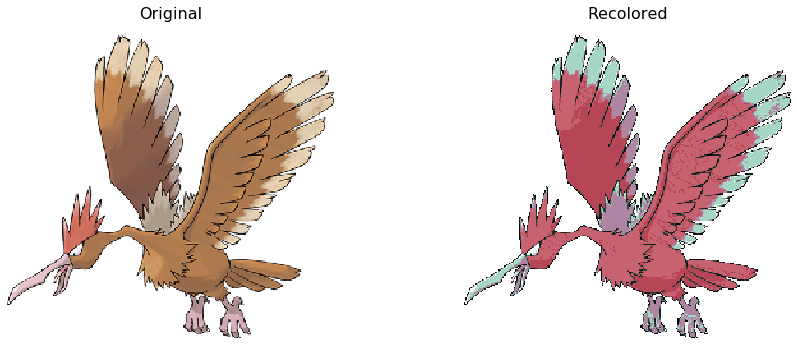

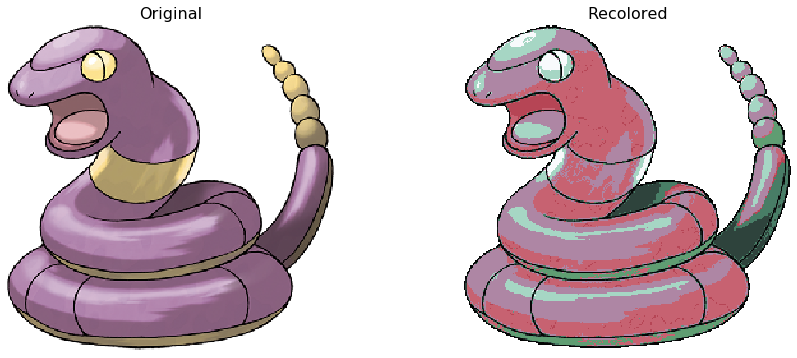

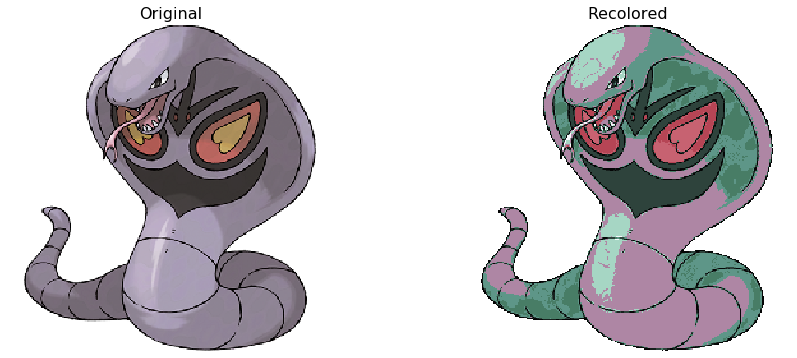

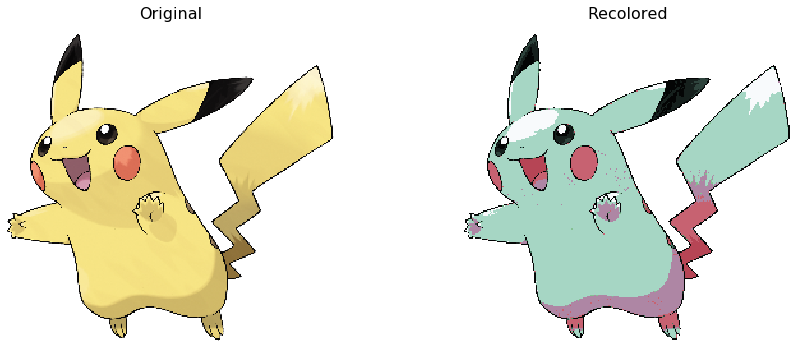

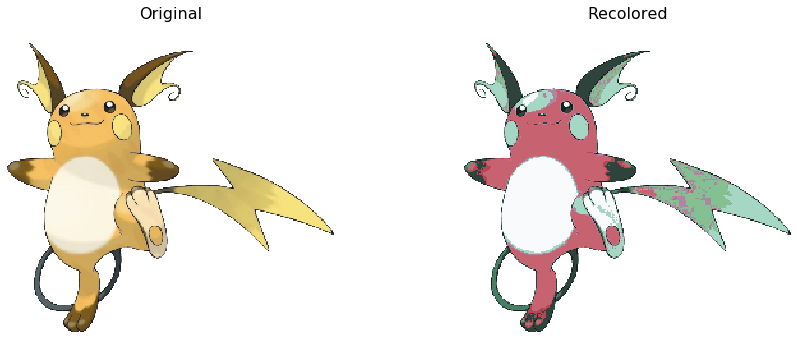

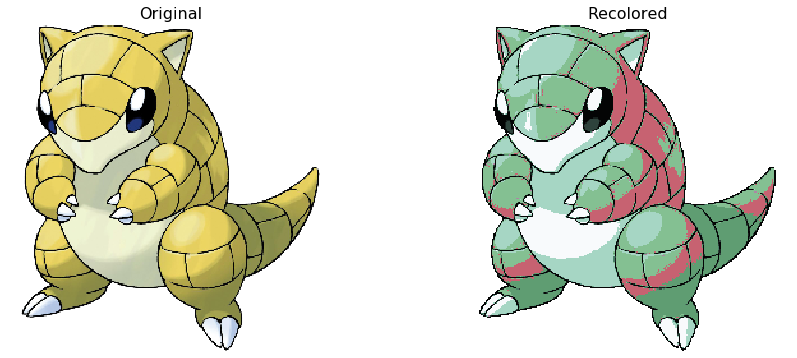

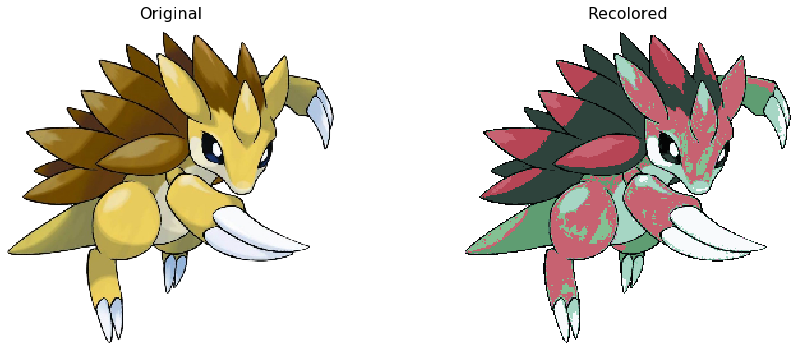

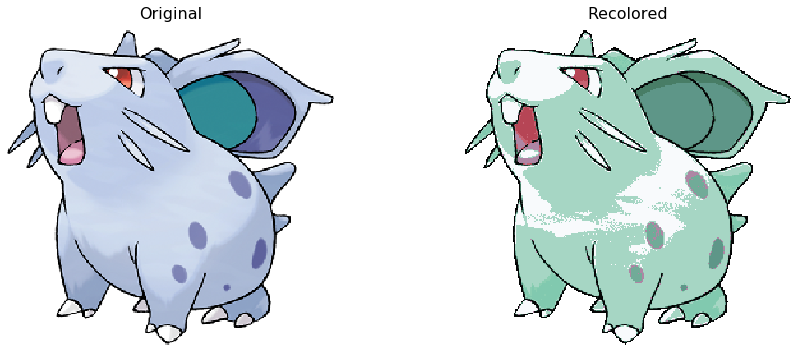

In [14]:
for i in range(1,30):
    recolor(kluster,pokedex[str(i)][0],pokedex[str(i)][1])